# 로지스틱 회귀_이진 분류

# 데이터 준비

In [1]:
import pandas as pd

fish = pd.read_csv("/content/drive/MyDrive/AIML_bum/fish_csv_data.csv")

In [2]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [4]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
# 입력데이터(5개의 특성이 존재)
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [6]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
fish_target = fish['Species'].to_numpy()
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

# 데이터 전처리


In [97]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input,fish_target,random_state=42
)
##0.25, train_size default

In [39]:
print(train_input.shape, train_target.shape)

(119, 5) (119,)


In [98]:
##표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 모델 선택

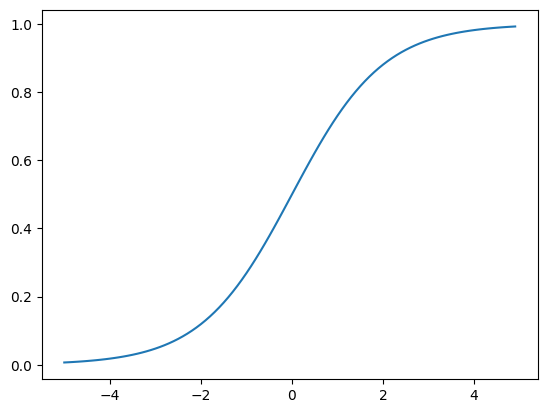

In [11]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5,5,0.1) # -5~5 0.1 간격의 배열

phi = 1 / (1+np.exp(-z)) #sigmoid function

plt.plot(z,phi)
plt.show()

In [12]:
## 불리언 인덱싱

char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [13]:
## 추가문제
arr = np.array([1,2,3,4,5])
#arr1과 arr2의 출력결과는?
arr1 = arr[arr > 2]
arr2 = arr[arr%2 == 0]

print(arr1 == np.array([3,4,5]))
print(arr2 == np.array([2,4]))

print(arr1,arr2)
print(type(arr1))

[ True  True  True]
[ True  True]
[3 4 5] [2 4]
<class 'numpy.ndarray'>


In [14]:
# Bream Smelt 요소 추출(데이터 전처리)
bream_smelt_indexes = (train_target == 'Smelt') | (train_target == 'Bream') # '|'를[python의 비트연산자와는 다르다] 통해 요소단위 판단

train_bream_smlet = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

bream_smelt_indexes_test = (test_target == 'Smelt') | (test_target == 'Bream')
test_bream_smelt = test_scaled[bream_smelt_indexes_test]
test_target_bream_smelt = test_target[bream_smelt_indexes_test]

# 모델 생성 및 모델 학습(훈련)

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smlet,target_bream_smelt)

LogisticRegression()

# 모델 검증

In [16]:
print(lr.score(train_bream_smlet,target_bream_smelt))
print(lr.score(test_bream_smelt,test_target_bream_smelt))

1.0
1.0


# 모델 예측(추론)

In [17]:
print(lr.predict(train_bream_smlet[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [79]:
## 예측 확률 #순서는 알파벳순 정렬 [Bream,Smelt]
print(lr.predict_proba(train_bream_smlet[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [19]:
print(lr.classes_) #후자가 양성(이진 분류)

['Bream' 'Smelt']


In [20]:
print(lr.coef_,lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [87]:
#decision_function()
decisions = lr.decision_function(train_bream_smlet[:])
print(decisions) # 양성에 대한 선형결합 값 출력 0보다 크면 선택됨(양성 클래스)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688  3.41099831
 -3.58967782 -7.66931655 -4.31727007 -2.22341548 -6.4698283  -6.03601551
 -5.77895847  3.23601973 -7.81091675  3.36381609  2.51455071 -3.88828092
 -7.39580986 -3.51427836 -3.99094045 -4.17926154 -3.25374833 -5.0242727
 -4.23461336  3.18456426 -5.44264864  3.34182307  3.40394191 -2.76321242
  2.48794425 -5.20693508 -4.77384768]


In [88]:
#sigmoid 함수를 이용한 확률 확인_expit
from scipy.special import expit
print(expit(decisions))
a=expit(decisions) # expit(lr.decision_function()) = predict_proba()

[2.39992835e-03 9.72626754e-01 5.13613552e-03 1.41495320e-02
 2.32581351e-03 9.68046497e-01 2.68655405e-02 4.66718913e-04
 1.31607262e-02 9.76673891e-02 1.54709455e-03 2.38536358e-03
 3.08240349e-03 9.62167489e-01 4.05122141e-04 9.66554359e-01
 9.25155604e-01 2.00694898e-02 6.13442824e-04 2.89086870e-02
 1.81469269e-02 1.50789532e-02 3.71924297e-02 6.53340168e-03
 1.42785787e-02 9.60249253e-01 4.30935384e-03 9.65836049e-01
 9.67827503e-01 5.93447853e-02 9.23292333e-01 5.44858922e-03
 8.37704538e-03]


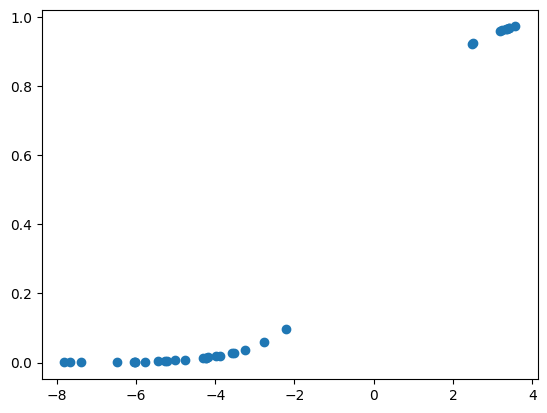

In [89]:
plt.scatter(decisions,a)
plt.show()

# 로지스틱 회귀_다중분류

In [25]:
print(train_target) # 섞이긴 했는데 샘플링 편향이 보임

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch' 'Perch' 'Bream' 'Perch' 'Parkki' 'Perch' 'Bream' 'Smelt' 'Perch'
 'Roach' 'Bream' 'Pike' 'Bream' 'Pike' 'Perch' 'Parkki' 'Bream' 'Perch'
 'Pike' 'Bream' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Roach' 'Perch'
 'Bream' 'Bream' 'Perch' 'Perch' 'Roach' 'Pike' 'Perch' 'Smelt' 'Pike'
 'Roach' 'Perch' 'Parkki' 'Perch' 'Bream' 'Perch' 'Smelt' 'Perch' 'Parkki'
 'Smelt' 'Perch' 'Perch' 'Roach' 'Bream' 'Perch' 'Perch' 'Roach' 'Roach'
 'Perch' 'Perch' 'Bream' 'Roach' 'Bream' 'Roach' 'Parkki' 'Perch' 'Perch'
 'Perch' 'Perch' 'Pike' 'Pike' 'Perch' 'Bream' 'Perch' 'Bream' 'Whitefish'
 'Pike' 'Bream' 'Bream' 'Roach' 'Perch' 'Pike' 'Bream' 'Pike' 'Parkki'
 'Roach' 'Perch' 'Roach' 'Smelt' 'Whitefish' 'Roach' 'Perch' 'Bream'
 'Whitefish' 'Smelt' 'Pike' 'Roach' 'Smelt' 'Bream' 'Roach' 'Pike' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Bream' 'Parkki' 'Perch'
 'Bream' 'Perch' 'Perch']


In [48]:
from sklearn.model_selection import train_test_split

strain_input, stest_input, strain_target, stest_target = train_test_split(
    fish_input,fish_target,random_state=42 , stratify=fish_target
)
##0.25, train_size default
##균일한 클래스 분포

In [49]:
##표준화
from sklearn.preprocessing import StandardScaler

sss = StandardScaler()
sss.fit(strain_input)
strain_scaled = sss.transform(strain_input)
stest_scaled = sss.transform(stest_input)

In [100]:
lr_mc = LogisticRegression()
lr_mc.fit(train_scaled,train_target)

LogisticRegression()

In [52]:
lr_smc = LogisticRegression()
lr_smc.fit(strain_scaled,strain_target)

LogisticRegression()

In [101]:
print(lr_mc.score(strain_scaled,strain_target))
print(lr_mc.score(stest_scaled,stest_target))

0.8235294117647058
0.825


In [55]:
print(lr_smc.score(strain_scaled,strain_target))
print(lr_smc.score(stest_scaled,stest_target)) # 음 균일한 클래스 분포가 항상 성능을 높이는건 아니구나

0.8151260504201681
0.825


#모델 예측(추론)

In [56]:
lr_smc.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [63]:
proba = lr_smc.predict_proba(test_scaled[:5])
print(proba)
print(np.round(proba,decimals=3))
print(sorted(pd.unique(fish['Species'])))

[[5.16155479e-03 8.79563447e-02 5.58199684e-01 1.01617487e-02
  2.59882475e-01 5.72734983e-02 2.13646946e-02]
 [3.25746503e-04 5.62436560e-02 1.23246009e-01 3.40566514e-03
  8.65354643e-02 7.27209693e-01 3.03376597e-03]
 [9.52429025e-03 9.42246901e-03 2.06365921e-01 5.94385490e-01
  1.50634518e-01 4.34846088e-03 2.53188510e-02]
 [7.46241466e-02 7.84253824e-02 5.03907135e-01 3.74433734e-02
  2.31182470e-01 2.68520392e-03 7.17322886e-02]
 [4.88995908e-03 2.96427155e-02 6.74659101e-01 2.90405762e-02
  2.19543302e-01 1.53780491e-02 2.68462969e-02]]
[[0.005 0.088 0.558 0.01  0.26  0.057 0.021]
 [0.    0.056 0.123 0.003 0.087 0.727 0.003]
 [0.01  0.009 0.206 0.594 0.151 0.004 0.025]
 [0.075 0.078 0.504 0.037 0.231 0.003 0.072]
 [0.005 0.03  0.675 0.029 0.22  0.015 0.027]]
['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']


In [70]:
df = np.round(proba, decimals=3)
df_proba = pd.DataFrame(df)
df_proba.columns = sorted(pd.unique(fish['Species']))
df_proba["predict"] = lr_smc.predict(test_scaled[:5])
df_proba


,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,predict
0,0.005,0.088,0.558,0.010,0.260,0.057,0.021,Perch
1,0.000,0.056,0.123,0.003,0.087,0.727,0.003,Smelt
2,0.010,0.009,0.206,0.594,0.151,0.004,0.025,Pike
3,0.075,0.078,0.504,0.037,0.231,0.003,0.072,Perch
4,0.005,0.030,0.675,0.029,0.220,0.015,0.027,Perch


In [72]:
print(lr_smc.coef_.shape,lr_smc.intercept_.shape)

(7, 5) (7,)


In [103]:
#decision_function  z값 선형결합 값 출력
decisions = lr_smc.decision_function(test_scaled[:5])
print(np.round(decisions,decimals=2)) #z가 크면 확률도 큼(a,활성화함수값)

[[-2.28  0.56  2.41 -1.6   1.64  0.13 -0.86]
 [-4.14  1.01  1.8  -1.79  1.45  3.57 -1.91]
 [-1.45 -1.46  1.63  2.68  1.31 -2.23 -0.47]
 [ 0.14  0.19  2.05 -0.55  1.27 -3.19  0.1 ]
 [-2.17 -0.36  2.76 -0.38  1.64 -1.02 -0.46]]


In [105]:
# 소프트 맥스 함수를 이용한 확률 확인_softmax()
from scipy.special import softmax

proba = softmax(decisions,axis=-1) # softmax(lr.decision_function()) = predict_proba
print(np.round(proba,decimals=3))

[[0.005 0.088 0.558 0.01  0.26  0.057 0.021]
 [0.    0.056 0.123 0.003 0.087 0.727 0.003]
 [0.01  0.009 0.206 0.594 0.151 0.004 0.025]
 [0.075 0.078 0.504 0.037 0.231 0.003 0.072]
 [0.005 0.03  0.675 0.029 0.22  0.015 0.027]]


In [116]:
# 하이퍼 파라미터 튜닝, 규제값과 반복값 찾기
train_scores = []
test_scores = []
for i in range(20,0,-1):
  lr_ = LogisticRegression(C=i)
  lr_.fit(strain_scaled,strain_target)
  train_scores.append(lr_.score(strain_scaled,strain_target))
  test_scores.append(lr_.score(stest_scaled,stest_target))
score = np.column_stack([train_scores,test_scores])
df = pd.DataFrame(score)
df.index = np.arange(20,0,-1)
df.columns = ("train",'test')
df

,train,test
20,0.924370,0.975
19,0.915966,0.975
18,0.915966,0.975
17,0.915966,0.975
16,0.915966,0.975
15,0.907563,0.975
14,0.907563,0.950
13,0.899160,0.950
12,0.899160,0.925
11,0.899160,0.925


In [117]:
# 하이퍼 파라미터 튜닝, 규제값과 반복값 찾기
train_scores = []
test_scores = []
for i in range(100,500,10):
  lr_ = LogisticRegression(C=20,max_iter=i)
  lr_.fit(strain_scaled,strain_target)
  train_scores.append(lr_.score(strain_scaled,strain_target))
  test_scores.append(lr_.score(stest_scaled,stest_target))
score = np.column_stack([train_scores,test_scores])
df = pd.DataFrame(score)
df.index = np.arange(100,500,10)
df.columns = ("train",'test')
df

lr_.tol

,train,test
100,0.92437,0.975
110,0.92437,0.975
120,0.92437,0.975
130,0.92437,0.975
140,0.92437,0.975
150,0.92437,0.975
160,0.92437,0.975
170,0.92437,0.975
180,0.92437,0.975
190,0.92437,0.975


*규제 상수(C 규제 강도의 역수)는 모델 성능의 큰 영향을 끼치지만 최대 반복횟수(max_iter)는 모델이 수렴한 이후로는 성능에 영향을 주지않음*

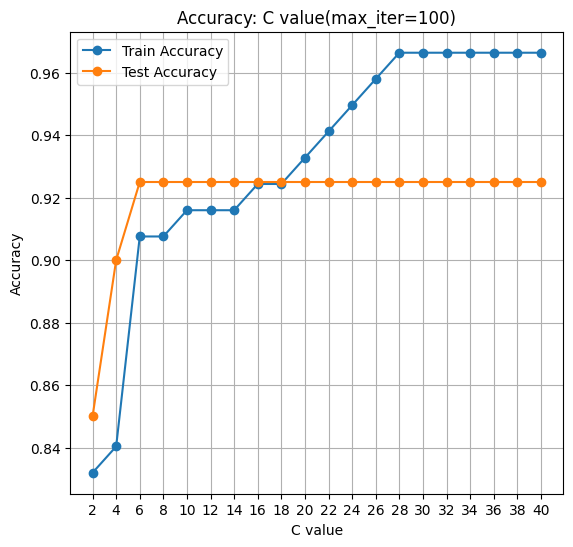

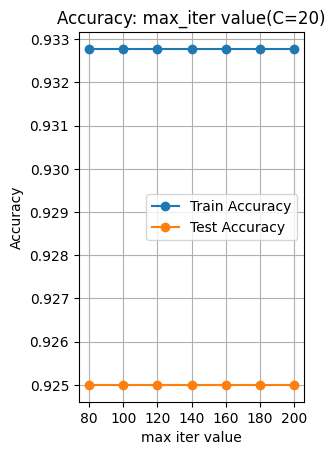

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

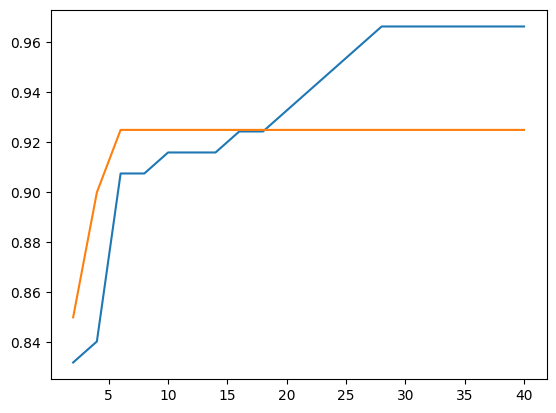

In [130]:
c_values = np.arange(40,0,-2)
max_iter_values = np.arange(80,201,20)

train_scores = []
test_scores = []

for c in c_values:
  _lr = LogisticRegression(C= c)
  _lr.fit(train_scaled,train_target)
  train_scores.append(_lr.score(train_scaled,train_target))
  test_scores.append(_lr.score(test_scaled,test_target))
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
plt.plot(c_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(c_values, test_scores, marker='o', label='Test Accuracy')
plt.title('Accuracy: C value(max_iter=100)')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xticks(c_values)
plt.legend()
plt.grid()
plt.show()

mtrain_scores = []
mtest_scores = []
for max_iter in max_iter_values:
  _lr = LogisticRegression(C=20, max_iter=max_iter)
  _lr.fit(train_scaled,train_target)
  mtrain_scores.append(_lr.score(train_scaled,train_target))
  mtest_scores.append(_lr.score(test_scaled,test_target))
plt.subplot(1,2,2)
plt.plot(max_iter_values, mtrain_scores, marker='o', label='Train Accuracy')
plt.plot(max_iter_values, mtest_scores, marker='o', label='Test Accuracy')
plt.title('Accuracy: max_iter value(C=20)')
plt.xlabel('max iter value')
plt.ylabel('Accuracy')
plt.xticks(max_iter_values)
plt.legend()
plt.grid()
plt.show()

train_scores_iter = []
test_scores_iter = []

for max_iter in max_iter_values:
  for C in c_values:
      lr = LogisticRegression(C=C, max_iter=max_iter)
      lr.fit(train_scaled, train_target)
      train_scores_iter.append(lr.score(train_scaled, train_target))
      test_scores_iter.append(lr.score(test_scaled, test_target))
plt.plot(c_values,train_scores)
plt.plot(c_values,test_scores)
plt.show()